In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/electricity_bill_dataset.csv')

# Preview data
print(df.head())
print("\nShape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())


   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16            23               2           6        1          0     10   
1   19            22               2           3        1          0      5   
2    7            20               2           6        7          0      7   
3    7            22               3          21        1          0      6   
4   11            23               2          11        1          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8       

In [ ]:
# Replace null values
# Numeric: Fill with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Categorical: Fill with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again
print("\nNulls after filling:\n", df.isnull().sum())



Nulls after filling:
 Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [ ]:
# Label Encode all object columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


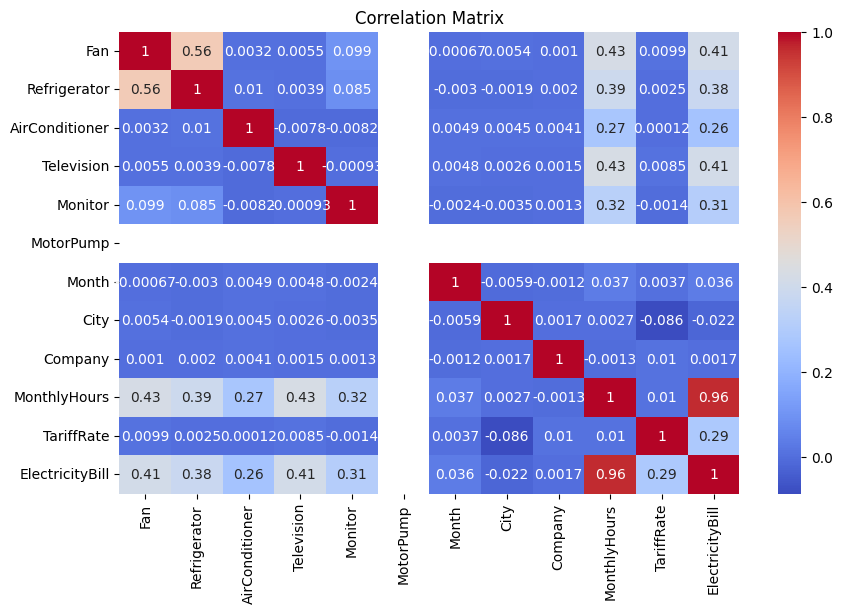


City:
 City
5     2914
9     2914
13    2892
3     2891
4     2878
0     2868
10    2848
7     2846
1     2834
2     2821
8     2816
11    2793
12    2788
14    2780
6     2740
15    2722
Name: count, dtype: int64

Company:
 Company
23    1486
6     1477
4     1476
24    1471
12    1470
15    1466
17    1463
10    1456
3     1453
9     1442
22    1441
18    1427
28    1426
11    1423
31    1421
19    1414
14    1408
7     1408
26    1405
25    1401
0     1400
20    1398
13    1397
16    1395
8     1389
1     1389
30    1386
5     1385
2     1355
27    1345
21    1340
29    1332
Name: count, dtype: int64


In [ ]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=np.number)

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Value counts for categorical features
for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts())


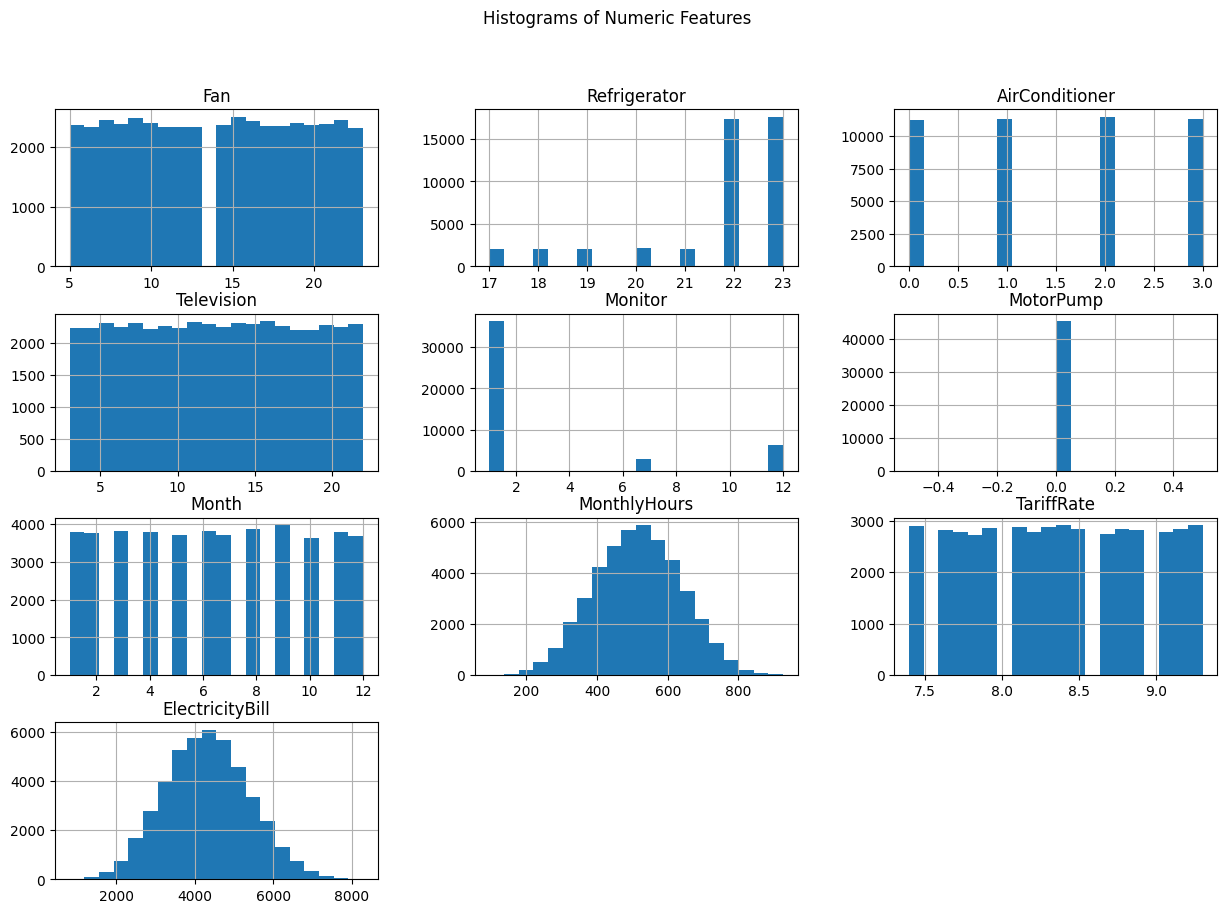

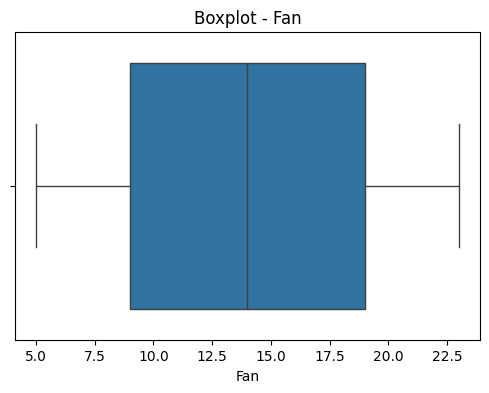

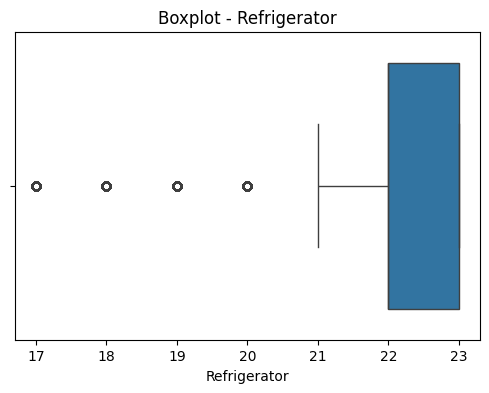

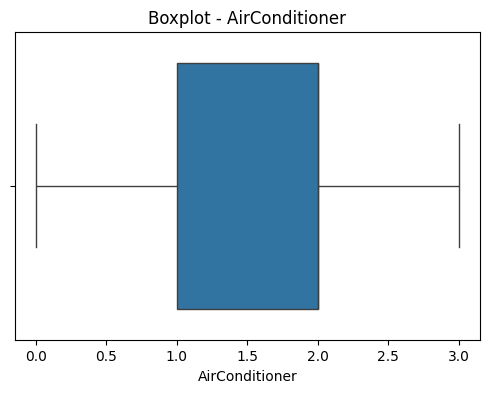

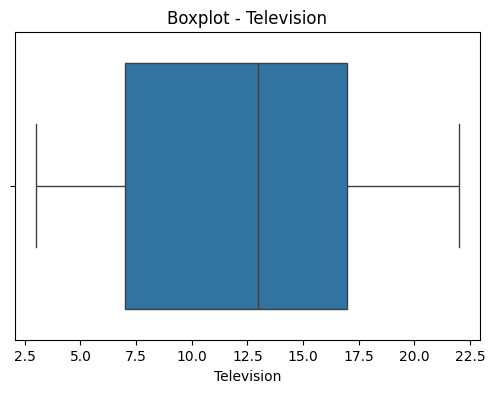

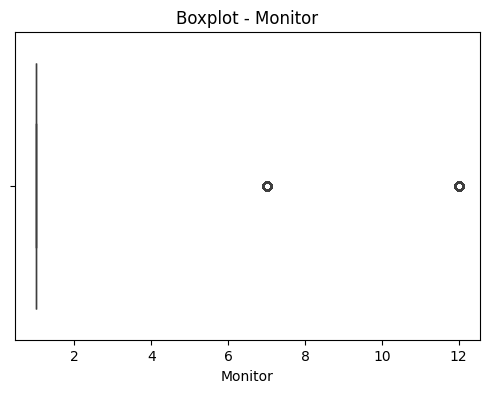

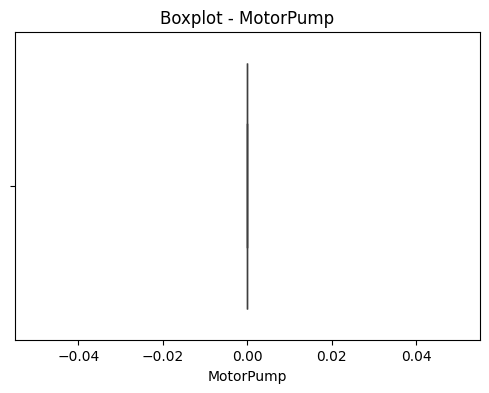

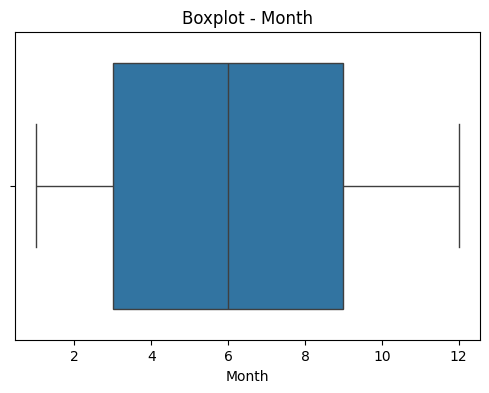

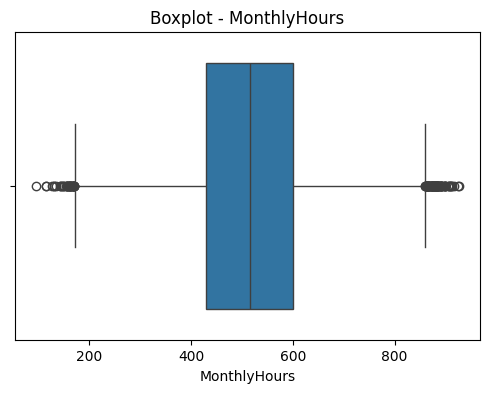

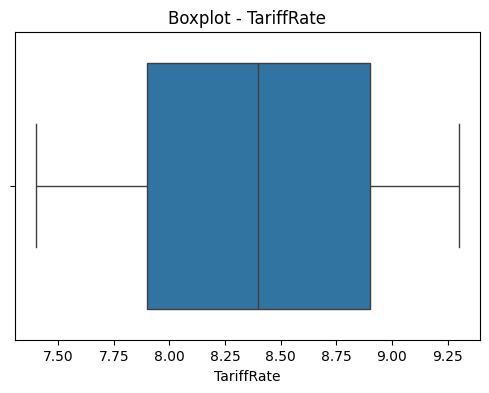

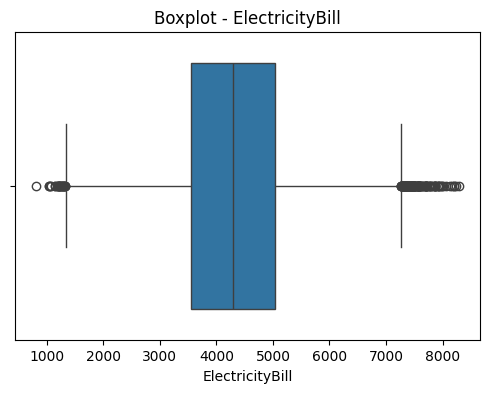

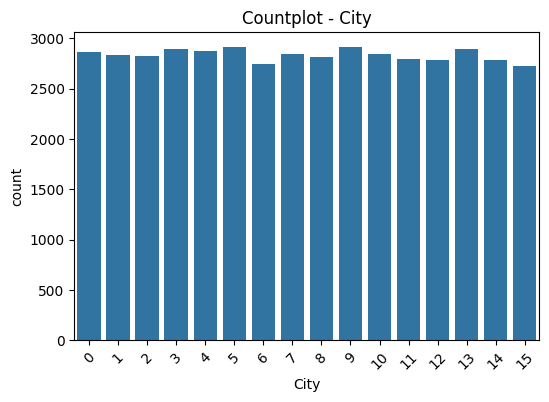

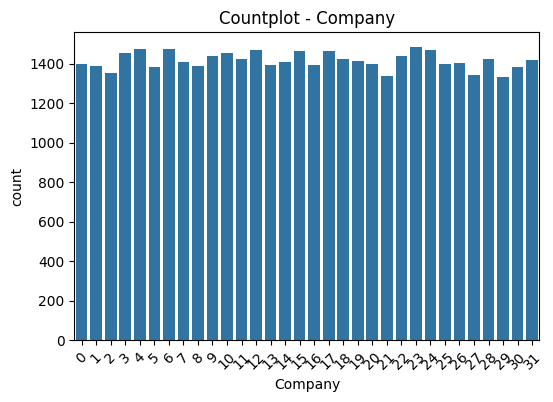

In [ ]:
# Histograms for numeric features
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Boxplots to check for outliers
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot - {col}")
    plt.show()

# Bar plot for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot - {col}")
    plt.xticks(rotation=45)
    plt.show()

# Pairplot (if dataset is not too large)
# sns.pairplot(df[num_cols])
# plt.show()


In [ ]:
df

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23,2,6,1,0,10,5,27,384,8.4,3225.6
1,19,22,2,3,1,0,5,15,13,488,7.8,3806.4
2,7,20,2,6,7,0,7,14,8,416,7.7,3203.2
3,7,22,3,21,1,0,6,7,19,475,9.2,4370.0
4,11,23,2,11,1,0,2,7,20,457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22,3,22,1,0,9,0,12,764,7.9,6035.6
45341,23,23,2,6,12,0,2,10,18,572,8.5,4862.0
45342,22,22,2,20,1,0,1,10,3,609,8.5,5176.5
45343,8,21,2,22,7,0,12,13,30,748,7.4,5535.2


In [ ]:
# Assuming the column to predict is called 'bill_amount'
# Change this if your actual column name is different
target_col = 'ElectricityBill'

X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
print(df.columns.tolist())


['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate', 'ElectricityBill']


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score": r2
    })


               Model            MSE         MAE  R2 Score
2      Random Forest      26.371926    1.420627  0.999977
1      Decision Tree      87.914147    1.782181  0.999923
5            XGBoost     354.600943    9.084173  0.999689
3  Gradient Boosting     518.726535   17.904178  0.999545
0  Linear Regression    4970.295870   49.201572  0.995638
4                SVR  173957.056142  277.398301  0.847328


<ipython-input-12-0b2bb0aa49ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2 Score", palette="viridis")


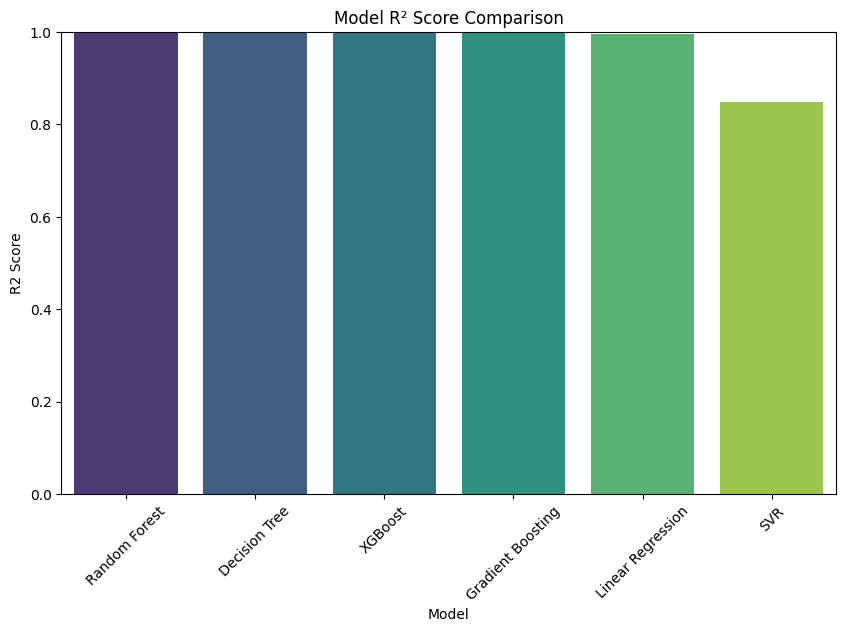

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

# Optional bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="viridis")
plt.title("Model R² Score Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor()
}

# Store results
all_results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2}")

    # Store results
    all_results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2 Score": r2,
        "Predictions": y_pred  # You can store full predictions if needed
    })

    # Display first 5 actual vs predicted
    print("\nSample Predictions:")
    comparison = pd.DataFrame({
        "Actual": y_test.values[:5],
        "Predicted": y_pred[:5]
    })
    print(comparison)

    print("\n" + "-"*50 + "\n")


Training Linear Regression...

Linear Regression Evaluation:
MSE: 4970.30
MAE: 49.20
R² Score: 0.9956378681437017

Sample Predictions:
   Actual    Predicted
0  5054.7  5034.877678
1  3809.2  3856.423242
2  3245.3  3235.345228
3  5728.8  5725.830856
4  4148.0  4151.964783

--------------------------------------------------

Training Decision Tree...

Decision Tree Evaluation:
MSE: 91.11
MAE: 1.82
R² Score: 0.9999200416799239

Sample Predictions:
   Actual  Predicted
0  5054.7     5054.7
1  3809.2     3809.2
2  3245.3     3237.0
3  5728.8     5728.8
4  4148.0     4148.0

--------------------------------------------------

Training Random Forest...

Random Forest Evaluation:
MSE: 25.64
MAE: 1.38
R² Score: 0.9999774932004085

Sample Predictions:
   Actual  Predicted
0  5054.7   5057.397
1  3809.2   3809.734
2  3245.3   3245.466
3  5728.8   5728.716
4  4148.0   4148.085

--------------------------------------------------

Training Gradient Boosting...

Gradient Boosting Evaluation:
MSE: 51

In [ ]:
from sklearn.metrics import r2_score

# Assuming:
# y_test = actual values (from test split)
# y_pred = predicted values (from your model)

r2 = r2_score(y_test, y_pred)
print(f"R² Score on Test Data: {r2:.4f}")


R² Score on Test Data: 0.9997


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R² Score: {r2}")


Random Forest R² Score: 0.9999762787422691


# Statistical Models

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Hypothetical data (replace with your actual dataset)
data = {
    'Month': [1, 2, 3, 4, 5, 6, 7, 8],
    'ElectricityBill': [3225.6, 3806.4, 3203.2, 4370, 4204.4, 3485.4, 6417.5, 4182]
}
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%m')  # Treat as monthly data
df.set_index('Month', inplace=True)

In [ ]:
# ARIMA(p,d,q) - Manually tune (p,d,q) or use auto_arima
model_arima = ARIMA(df['ElectricityBill'], order=(1, 1, 1))  # Example order
result_arima = model_arima.fit()
print(result_arima.summary())

# Forecast next 3 months
forecast_arima = result_arima.forecast(steps=3)
print("ARIMA Forecast:", forecast_arima)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

                               SARIMAX Results                                
Dep. Variable:        ElectricityBill   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -59.879
Date:                Sun, 27 Apr 2025   AIC                            125.758
Time:                        06:20:49   BIC                            125.596
Sample:                    01-01-1900   HQIC                           123.753
                         - 08-01-1900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3881      1.180     -0.329      0.742      -2.702       1.925
ma.L1         -0.2409      1.633     -0.148      0.883      -3.441       2.959
sigma2       1.33e+06   7.04e+05      1.888      0.0

In [ ]:
# SARIMA(p,d,q)(P,D,Q,s) - s=12 for yearly seasonality (if data were monthly)
model_sarima = SARIMAX(
    df['ElectricityBill'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)  # Hypothetical seasonal order
)
result_sarima = model_sarima.fit()
print(result_sarima.summary())

# Forecast next 3 months
forecast_sarima = result_sarima.forecast(steps=3)
print("SARIMA Forecast:", forecast_sarima)

                                     SARIMAX Results                                      
Dep. Variable:                    ElectricityBill   No. Observations:                    8
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sun, 27 Apr 2025   AIC                             10.000
Time:                                    06:20:53   BIC                                nan
Sample:                                01-01-1900   HQIC                               nan
                                     - 08-01-1900                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Custom Model Wrapper
class ElectricityBillPredictor:
    def __init__(self):
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()

        # Encodings
        self.city_encoding = {
            'Mumbai': 0, 'New Delhi': 1, 'Hyderabad': 2,
            'Vadodara': 3, 'Shimla': 4, 'Ratnagiri': 5
        }
        self.company_encoding = {
            'Tata Power Company Ltd.': 0,
            'Adani Power Ltd.': 1,
            'Power Grid Corp': 2,
            'NHPC': 3,
            'Jyoti Structure': 4,
            'Kalpataru Power': 5,
            'Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)': 6
        }
        self.month_encoding = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
        }

    def train(self, df):
        required_columns = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                            'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate', 'ElectricityBill']
        missing = [col for col in required_columns if col not in df.columns]
        if missing:
            raise ValueError(f"❌ Missing columns in dataset: {missing}")

        # Encode categorical columns
        df['City'] = df['City'].map(self.city_encoding)
        df['Company'] = df['Company'].map(self.company_encoding)
        df['Month'] = df['Month'].map(self.month_encoding)

        # Prepare features and target
        X = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate']]
        y = df['ElectricityBill']

        # Scale features and train the model
        X_scaled = self.scaler.fit_transform(X)
        self.model.fit(X_scaled, y)

    def predict(self, city, company, daily_hours, appliances, month_name, tariff_rate):
        try:
            monthly_hours = daily_hours * 30

            # Ensure appliance names match the model's expected names
            input_features = [
                appliances.get('Fan', 0),  # Default to 0 if key missing
                appliances.get('Refrigerator', 0),
                appliances.get('AirConditioner', 0),
                appliances.get('Television', 0),
                appliances.get('Monitor', 0),
                appliances.get('MotorPump', 0),
                self.month_encoding[month_name],
                self.city_encoding[city],
                self.company_encoding[company],
                monthly_hours,
                tariff_rate
            ]

            input_scaled = self.scaler.transform([input_features])
            prediction = self.model.predict(input_scaled)
            return prediction[0]

        except Exception as e:
            print(f"Prediction error: {e}")
            return None

# Load the dataset
df = pd.read_csv("electricity_bill_dataset.csv")

# Train and save the predictor
predictor = ElectricityBillPredictor()

try:
    predictor.train(df)

    with open("electricity_predictor_model.pkl", "wb") as f:
        pickle.dump(predictor, f)

    print("✅ Model and logic saved to 'electricity_predictor_model.pkl'")

    # Test prediction with corrected appliance names
    appliances_test = {
        'Fan': 12,
        'Refrigerator': 1,
        'AirConditioner': 2,
        'Television': 1,
        'Monitor': 1,
        'MotorPump': 0
    }

    result = predictor.predict(
        city='Mumbai',
        company='Tata Power Company Ltd.',
        daily_hours=12,
        appliances=appliances_test,
        month_name='January',
        tariff_rate=8.5
    )

    if result is not None:
        print(f"🔋 Test Prediction: ₹{result:.2f}")
    else:
        print("❌ Prediction failed, check error messages above.")

except ValueError as ve:
    print(ve)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


✅ Model and logic saved to 'electricity_predictor_model.pkl'
🔋 Test Prediction: ₹3060.09


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import pickle
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Custom Model Wrapper
class ElectricityBillPredictor:
    def __init__(self):
        # Define pipeline: Imputer -> Scaler -> SVR
        self.pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('svr', SVR(kernel='rbf', C=100, epsilon=0.1))
        ])

        # Encodings
        self.city_encoding = {
            'Mumbai': 0, 'New Delhi': 1, 'Hyderabad': 2,
            'Vadodara': 3, 'Shimla': 4, 'Ratnagiri': 5
        }
        self.company_encoding = {
            'Tata Power Company Ltd.': 0,
            'Adani Power Ltd.': 1,
            'Power Grid Corp': 2,
            'NHPC': 3,
            'Jyoti Structure': 4,
            'Kalpataru Power': 5,
            'Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)': 6
        }
        self.month_encoding = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
        }

    def train(self, df):
        required_columns = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                            'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate', 'ElectricityBill']
        missing = [col for col in required_columns if col not in df.columns]
        if missing:
            raise ValueError(f"❌ Missing columns in dataset: {missing}")

        df_encoded = df.copy()
        df_encoded['City'] = df_encoded['City'].map(self.city_encoding)
        df_encoded['Company'] = df_encoded['Company'].map(self.company_encoding)
        df_encoded['Month'] = df_encoded['Month'].map(self.month_encoding)

        X = df_encoded[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                        'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate']]
        y = df_encoded['ElectricityBill']

        self.pipeline.fit(X, y)

    def predict(self, city, company, daily_hours, appliances, month_name, tariff_rate):
        try:
            monthly_hours = daily_hours * 30
            # Use capitalized keys expected by model
            input_features = [
                appliances.get('Fan', 0),
                appliances.get('Refrigerator', 0),
                appliances.get('AirConditioner', 0),
                appliances.get('Television', 0),
                appliances.get('Monitor', 0),
                appliances.get('MotorPump', 0),
                self.month_encoding[month_name],
                self.city_encoding[city],
                self.company_encoding[company],
                monthly_hours,
                tariff_rate
            ]

            input_df = pd.DataFrame([input_features], columns=[
                'Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate'
            ])

            prediction = self.pipeline.predict(input_df)
            return prediction[0]

        except Exception as e:
            print(f"Prediction error: {e}")
            return None

# Load dataset
df = pd.read_csv("electricity_bill_dataset.csv")

# Train and save
predictor = ElectricityBillPredictor()
predictor.train(df)

with open("svr_electricity_predictor_model.pkl", "wb") as f:
    pickle.dump(predictor, f)

print("✅ Model trained and saved as 'svr_electricity_predictor_model.pkl'")

# Optional test
test_appliances = {
    'Fan': 5,
    'Refrigerator': 1,
    'AirConditioner': 1,
    'Television': 2,
    'Monitor': 1,
    'MotorPump': 0
}

result = predictor.predict(
    city='Mumbai',
    company='Tata Power Company Ltd.',
    daily_hours=10,
    appliances=test_appliances,
    month_name='April',
    tariff_rate=7.5
)

if result is not None:
    print(f"🔋 Test Prediction: ₹{result:.2f}")
else:
    print("❌ Prediction failed.")


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


✅ Model trained and saved as 'svr_electricity_predictor_model.pkl'
🔋 Test Prediction: ₹4247.53


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Custom Model Wrapper
class ElectricityBillPredictor:
    def __init__(self):
        # Define the pipeline with imputer, scaler, and LinearRegression
        self.pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute NaNs with mean
            ('scaler', StandardScaler()),  # Scale features
            ('linear', LinearRegression())  # Linear Regression model
        ])

        # Encodings
        self.city_encoding = {
            'Mumbai': 0, 'New Delhi': 1, 'Hyderabad': 2,
            'Vadodara': 3, 'Shimla': 4, 'Ratnagiri': 5
        }
        self.company_encoding = {
            'Tata Power Company Ltd.': 0,
            'Adani Power Ltd.': 1,
            'Power Grid Corp': 2,
            'NHPC': 3,
            'Jyoti Structure': 4,
            'Kalpataru Power': 5,
            'Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)': 6
        }
        self.month_encoding = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
        }

    def train(self, df):
        required_columns = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                            'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate', 'ElectricityBill']
        missing = [col for col in required_columns if col not in df.columns]
        if missing:
            raise ValueError(f"❌ Missing columns in dataset: {missing}")

        # Encode categorical columns
        df_encoded = df.copy()
        df_encoded['City'] = df_encoded['City'].map(self.city_encoding)
        df_encoded['Company'] = df_encoded['Company'].map(self.company_encoding)
        df_encoded['Month'] = df_encoded['Month'].map(self.month_encoding)

        # Prepare features and target
        X = df_encoded[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                        'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate']]
        y = df_encoded['ElectricityBill']

        # Train the pipeline (imputer -> scaler -> LinearRegression)
        self.pipeline.fit(X, y)

    def predict(self, city, company, daily_hours, appliances, month_name, tariff_rate):
        try:
            monthly_hours = daily_hours * 30

            # Ensure appliance names match the model's expected names
            input_features = [
                appliances.get('fans', 0),  # Match HTML input IDs
                appliances.get('refrigerator', 0),
                appliances.get('ac', 0),
                appliances.get('tv', 0),
                appliances.get('monitor', 0),
                appliances.get('pump', 0),
                self.month_encoding[month_name],
                self.city_encoding[city],
                self.company_encoding[company],
                monthly_hours,
                tariff_rate
            ]

            # Create a DataFrame to ensure feature names are preserved
            input_df = pd.DataFrame([input_features], columns=[
                'Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump',
                'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate'
            ])

            # Predict using the pipeline
            prediction = self.pipeline.predict(input_df)
            return prediction[0]

        except Exception as e:
            print(f"Prediction error: {e}")
            return None

# Load the dataset
df = pd.read_csv("electricity_bill_dataset.csv")

# Train and save the predictor
predictor = ElectricityBillPredictor()

try:
    predictor.train(df)

    with open("linear_electricity_predictor_model.pkl", "wb") as f:
        pickle.dump(predictor, f)

    print("✅ Linear Regression Model saved to 'linear_electricity_predictor_model.pkl'")

    # Test prediction with corrected appliance names
    appliances_test = {
        'fans': 12,
        'refrigerator': 1,
        'ac': 2,
        'tv': 1,
        'monitor': 1,
        'pump': 0
    }

    result = predictor.predict(
        city='Mumbai',
        company='Tata Power Company Ltd.',
        daily_hours=12,
        appliances=appliances_test,
        month_name='January',
        tariff_rate=8.5
    )

    if result is not None:
        print(f"🔋 Test Prediction: ₹{result:.2f}")
    else:
        print("❌ Prediction failed, check error messages above.")

except ValueError as ve:
    print(ve)

✅ Linear Regression Model saved to 'linear_electricity_predictor_model.pkl'
🔋 Test Prediction: ₹3075.63


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Month']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


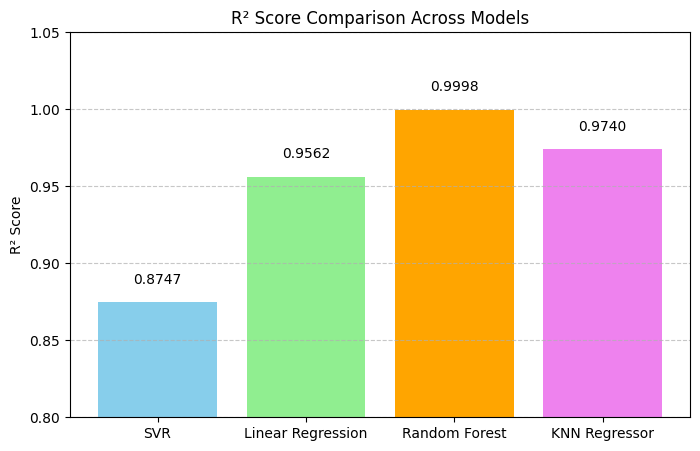

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding R² scores
models = ['SVR', 'Linear Regression', 'Random Forest', 'KNN Regressor']
r2_scores = [0.8747, 0.9562, 0.9998, 0.9740]

# Create a bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'orange', 'violet'])

# Add text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', va='bottom')

# Set plot title and labels
plt.title('R² Score Comparison Across Models')
plt.ylabel('R² Score')
plt.ylim(0.8, 1.05)  # Setting y-axis range for better visualization

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
